### **Support Vector Machine excercise**

# **SVM for classification**

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(80, 2)
(20, 2)


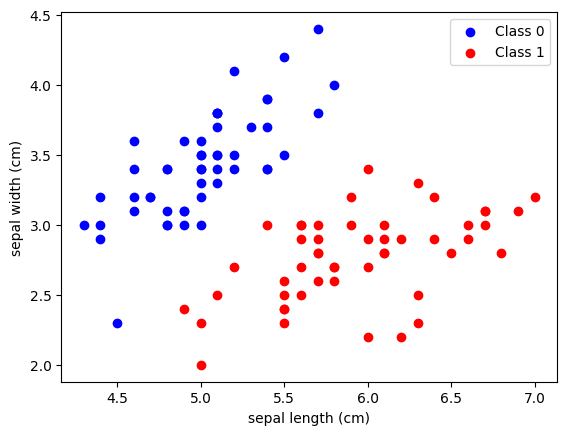

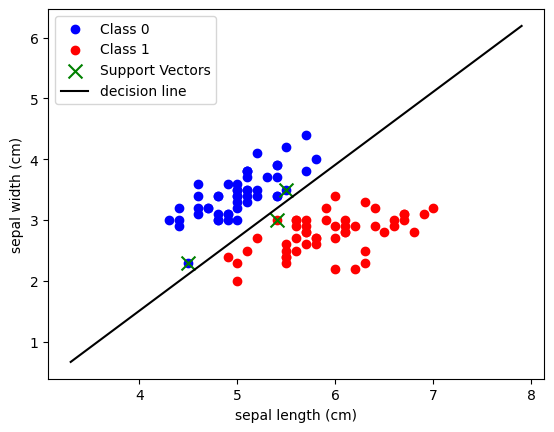

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


iris=load_iris()
iris.feature_names
print(iris.feature_names)
# print(iris.data[0:5,:])
# print(iris.target[0:5])
#print(iris.data)

X = iris.data[:, :2]
y = iris.target
X, y = X[y != 2], y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 1")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# the SVM classifier
SVMmodel=SVC(kernel='linear',C =200)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

# Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 1")
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100,color="green",marker="x", label='Support Vectors')


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 200)

# equation [w0 w1]*[x0 x1] + b = 0

y_vals = -(W[0, 0] * x_vals + b[0]) / W[0, 1]

# Delineation of decision boundary
plt.plot(x_vals, y_vals, 'k-',label="decision line")

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# **Anomaly detection via SVM**

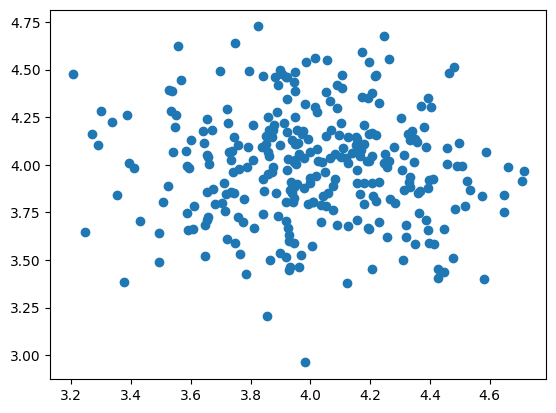

In [18]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

# Import one-class SVM and generate data (Gaussian blobs in 2D-plane)
random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()


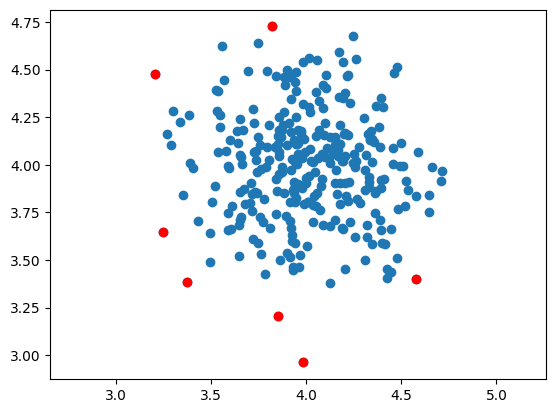

In [13]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
# Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()


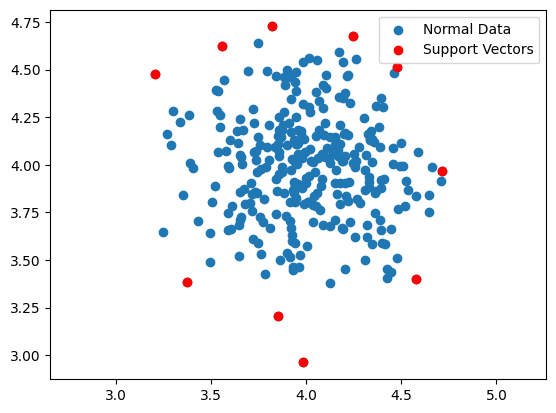

8.987833799021839


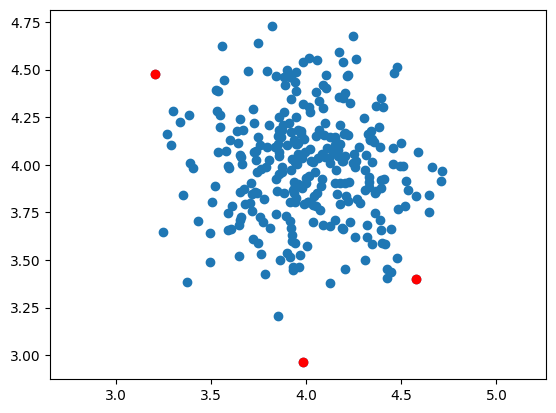

In [20]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

# Plot the support vectors
support_vectors = SVMmodelOne.support_vectors_

plt.scatter(x[:, 0], x[:, 1], label="Normal Data")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', label="Support Vectors")
plt.axis('equal')
plt.legend()
plt.show()


scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()
